# **Steam Reviews 2021 Analysis**

### Import libraries 

In [1]:
pip install textblob numpy matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

### Download the dataset from Kaggle

In [3]:
path = kagglehub.dataset_download("najzeko/steam-reviews-2021")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\flavi\.cache\kagglehub\datasets\najzeko\steam-reviews-2021\versions\1


# **Exploratory Data Analysis (EDA)**

 #### Before diving deep into the dataset provided, it is crucial to understand its structure and main features. 

In [4]:
# Define a function to parse a timestamp in seconds to a datetime format
def dateparse(time_in_sec):
    return pd.to_datetime(time_in_sec, unit="s") # Convert time in seconds to datetime format

In [5]:
df= pd.read_csv("steam_reviews.csv",index_col=0)

In [32]:
# Apply dateparse function to specific datetime types column of Dataset
df["timestamp_created"] = dateparse(df["timestamp_created"])
df["timestamp_updated"] = dateparse(df["timestamp_updated"])
df["author.last_played"] = dateparse(df["author.last_played"])

In [7]:
print(f"Dataset rows number: {df.shape[0]}\nDataset columns number: {df.shape[1]}") 

Dataset rows number: 21747371
Dataset columns number: 22


In [8]:
df.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [9]:
df.head() # visualize the first five values of each column

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


In [10]:
df.tail()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,2020-03-23 18:05:04,2020-03-23 18:05:04,True,0,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,2020-04-11 17:56:56
21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",2020-03-23 18:04:53,2020-03-23 18:04:53,True,0,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,2021-01-19 18:17:11
21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,2020-03-23 18:04:33,2020-03-23 18:04:33,True,0,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,2020-06-08 16:29:13
21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,2020-03-23 18:03:51,2020-04-08 21:47:02,True,0,0,...,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,2020-05-17 11:36:55
21747375,546560,Half-Life: Alyx,65644930,schinese,WMR加载中闪退，无法进入游戏\nWMR Flashback in Load，cant pl...,2020-03-23 18:01:45,2020-06-13 15:06:40,True,0,0,...,True,False,False,76561198116747069,253,7,1062.0,0.0,8.0,2020-10-16 14:12:23


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   app_id                          int64         
 1   app_name                        object        
 2   review_id                       int64         
 3   language                        object        
 4   review                          object        
 5   timestamp_created               datetime64[ns]
 6   timestamp_updated               datetime64[ns]
 7   recommended                     bool          
 8   votes_helpful                   int64         
 9   votes_funny                     int64         
 10  weighted_vote_score             float64       
 11  comment_count                   int64         
 12  steam_purchase                  bool          
 13  received_for_free               bool          
 14  written_during_early_access     bool          
 15  a

## Optimizing Data Types 

### **Importance of Data Type Conversion**

Converting int64 to int32 and float64 to float32 reduces memory usage and speeds up computations. This optimization is crucial for handling large datasets efficiently, saving resources, and improving performance.

In [12]:
for column in df.columns:
    if df[column].dtype=='int64':
        df[column]=df[column].astype("int32")
    elif df[column].dtype=='float64':
        df[column]=df[column].astype("float32")
df.dtypes

app_id                                     int32
app_name                                  object
review_id                                  int32
language                                  object
review                                    object
timestamp_created                 datetime64[ns]
timestamp_updated                 datetime64[ns]
recommended                                 bool
votes_helpful                              int32
votes_funny                                int32
weighted_vote_score                      float32
comment_count                              int32
steam_purchase                              bool
received_for_free                           bool
written_during_early_access                 bool
author.steamid                             int32
author.num_games_owned                     int32
author.num_reviews                         int32
author.playtime_forever                  float32
author.playtime_last_two_weeks           float32
author.playtime_at_r

In [13]:
# Count na values for each column
print(df.isnull().sum())

app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33748
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64


In [14]:
# clear the dataset 
df=df.dropna()
print(df.isnull().sum())

app_id                            0
app_name                          0
review_id                         0
language                          0
review                            0
timestamp_created                 0
timestamp_updated                 0
recommended                       0
votes_helpful                     0
votes_funny                       0
weighted_vote_score               0
comment_count                     0
steam_purchase                    0
received_for_free                 0
written_during_early_access       0
author.steamid                    0
author.num_games_owned            0
author.num_reviews                0
author.playtime_forever           0
author.playtime_last_two_weeks    0
author.playtime_at_review         0
author.last_played                0
dtype: int64


### Descriptive Statistics for a DataFrame

In [15]:
df.describe()

,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.168794e+07,2.168794e+07,21687945,21687945,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,21687945
mean,3.929268e+05,5.188274e+07,2018-12-10 17:56:20.150121216,2019-01-15 22:56:17.220821760,1.899059e+00,8.148161e-01,1.655262e-01,1.309590e-01,3.406181e+08,1.327215e+02,1.051874e+01,1.611049e+04,1.555895e+02,8.809670e+03,2020-02-01 15:37:33.922483200
min,7.000000e+01,4.300000e+01,2010-11-19 20:17:16,2010-11-19 20:17:16,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970-01-01 00:00:00
25%,2.427600e+05,3.642574e+07,2017-11-10 19:23:34,2017-11-27 03:32:55,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.110542e+08,2.200000e+01,2.000000e+00,1.253000e+03,0.000000e+00,5.590000e+02,2019-11-10 08:14:24
50%,3.595500e+05,5.383820e+07,2019-07-06 20:28:58,2019-10-27 11:48:18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.163602e+08,6.100000e+01,4.000000e+00,4.315000e+03,0.000000e+00,1.881000e+03,2020-09-02 16:01:43
75%,5.780800e+05,6.928469e+07,2020-05-17 04:42:36,2020-06-05 21:29:39,1.000000e+00,0.000000e+00,4.829141e-01,0.000000e+00,4.192129e+08,1.460000e+02,1.000000e+01,1.493800e+04,0.000000e+00,6.825000e+03,2020-12-26 17:07:27
max,1.291340e+06,8.521867e+07,2021-01-23 18:24:47,2042-05-11 00:59:57,2.960800e+04,2.253200e+04,9.959868e-01,4.893000e+03,1.173000e+09,2.425800e+04,5.236000e+03,3.744943e+06,2.703900e+04,3.228103e+06,2021-01-23 20:35:42
std,2.481071e+05,2.083272e+07,NaN,NaN,3.988429e+01,2.791677e+01,2.238012e-01,2.201967e+00,3.179290e+08,2.815630e+02,3.422650e+01,3.594262e+04,7.156135e+02,2.309705e+04,NaN


View all languages ​​of user-written reviews on the Steam gaming platform :

## Language and Review Analysis 

In [16]:
pd.unique(df.language)

array(['schinese', 'english', 'turkish', 'spanish', 'russian', 'koreana',
       'latam', 'brazilian', 'portuguese', 'vietnamese', 'polish',
       'french', 'german', 'hungarian', 'ukrainian', 'tchinese',
       'bulgarian', 'czech', 'italian', 'thai', 'greek', 'dutch',
       'finnish', 'romanian', 'japanese', 'swedish', 'danish',
       'norwegian'], dtype=object)

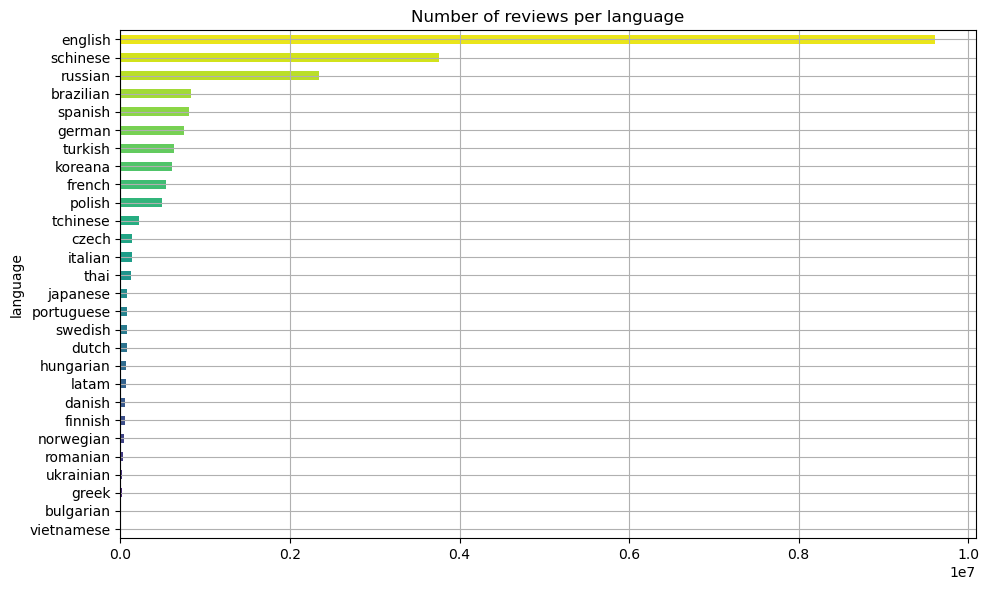

In [17]:
viridis = sns.color_palette("viridis",len(df.language.value_counts()))
plt.figure(figsize=(10,6))
df.language.value_counts().sort_values(ascending=True).plot.barh(
    width=0.5, 
    title="Number of reviews per language", 
    color=viridis
)
plt.tight_layout()
plt.grid()
plt.show()

From the barplot in the figure, it can be seen that the largest number of reviews written by users in 2021 are in English followed by Chinese and Russian.A possible reason for the largest number of reviews in English, followed by Chinese and Russian, could be the global prevalence of these languages among internet users. English remains the most widely used language online, enabling a larger base of users to engage with content and share reviews. Similarly, Chinese and Russian have large native-speaking populations, many of whom increasingly participate in global and local online platforms, contributing significantly to review counts. Additionally, these languages are commonly used on major review platforms, which may encourage users to write reviews in their native or most commonly used language.

In [18]:
english_reviews=df[["review"]][df["language"]=="english"][:100000]
english_reviews.head()

,review
3,"One of the best RPG's of all time, worthy of a..."
5,"good story, good graphics. lots to do."
6,"dis gud,"
18,favorite game of all time cant wait for the Ne...
20,Why wouldn't you get this


In [19]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    return 'positive' if polarity > 0 else ('negative' if polarity < 0 else 'neutral')

In [20]:
english_reviews['sentiment'] = english_reviews['review'].apply(get_sentiment)
english_reviews['sentiment'].head()

3     positive
5     positive
6      neutral
18    positive
20     neutral
Name: sentiment, dtype: object

In [21]:
english_reviews['sentiment'].value_counts()

sentiment
positive    68829
neutral     18067
negative    13104
Name: count, dtype: int64

In [22]:
Positive_percent=english_reviews['sentiment'].value_counts()[0]/100000 * 100
Neutral_percent= english_reviews['sentiment'].value_counts()[1]/100000 * 100
Negative_percent= english_reviews['sentiment'].value_counts()[2]/100000 * 100

print(f"The Positive percent is {str(round(Positive_percent,2))}% "
     f"Neutral percent is {str(round(Neutral_percent,2))}% "
     f"Negative percent is {str(round(Negative_percent,2))}%")

The Positive percent is 68.83% Neutral percent is 18.07% Negative percent is 13.1%


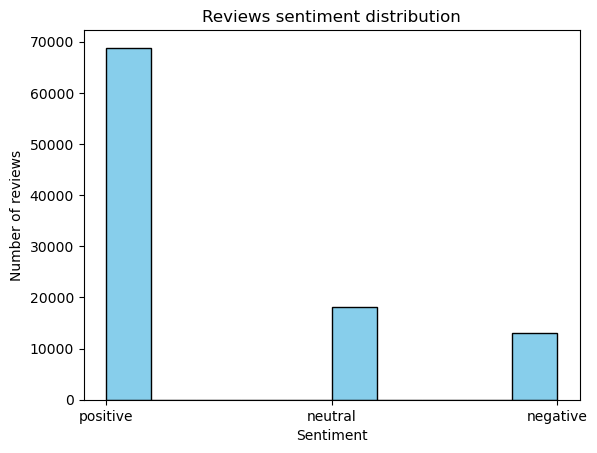

In [23]:
plt.hist(english_reviews['sentiment'], color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.title('Reviews sentiment distribution')
plt.show()

## Steam game reviews sentiment Analysis

The following analysis explores the sentiment distribution of Steam game reviews in **English**, which range from -1.0 (negative) to 1.0 (positive).

### Dataset size information and implications

- For this analysis we considered only 100000 reviews 

### Comments of the results

- Steam community shows a **strong tendency** toward positive feedback
- Only about 13% of reviews are negative
- The number of neutral reviews is similar to the number of negative reviews

### Considerations

- Steam users generally provide **positive feedback**, indicating satisfaction with the games reviewed.
- Extremely negative reviews are **uncommon**, suggesting that users are either content with their experiences or selective in their critiques.
- **Moderate positivity** seems to be the norm rather than extreme opinions, reflecting a balanced perspective among reviewers.
- The review system illustrates a **healthy and engaged community**, contributing to the overall success of games on the platform.


## Number of videogames owned per Steam utent 

In [24]:
number_videogames_owned=df["author.num_games_owned"].value_counts().sort_values(ascending=False)

### **We create different categories of users based on the games they own in their Steam library**

In [25]:
bins = [1, 10, 20, 51, 201, float('inf')]  
Gamer_categories = ['Occasional', 'Casual Gamer', 'Moderate Gamer', 'Passionate Gamer', 'Collector']  

In [26]:
df['game_category'] = pd.cut(df['author.num_games_owned'], bins=bins, labels=Gamer_categories, right=True)
category_counts = df['game_category'].value_counts()

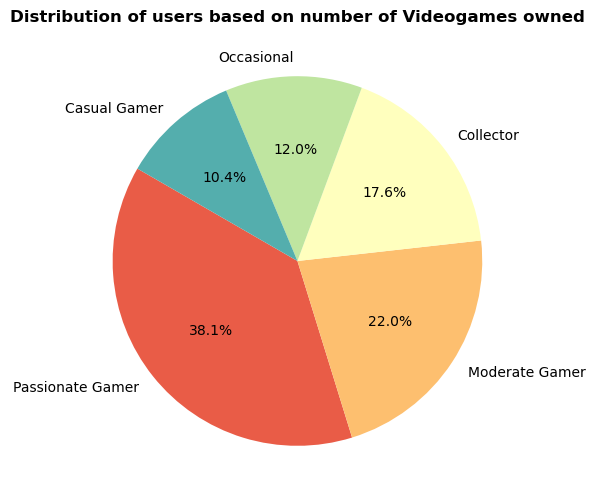

In [27]:
Spectral=sns.color_palette("Spectral",5)
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=150, colors=Spectral)
plt.title('Distribution of users based on number of Videogames owned',fontsize=12, fontweight='bold')
plt.show()

## User Distribution Analysis by Game Ownership 

The pie chart illustrates the distribution of Steam users by the number of games they own. **Users are divided into five distinct groups:**

- **Passionate Gamer:** This is the largest category, comprising 38.1% of users. Avid gamers are likely to have a strong dedication to gaming, amassing a sizeable collection of games. This group may consist of users who are frequently active on the platform, who purchase and play a wide variety of games, such as streamers, YouTubers, and content creators from other platforms;

- **Moderate Gamer:** The second largest group, comprising 22% of the user base, is likely to consist of gamers who enjoy gaming but have a small library. They may be selective in their purchases, purchasing only games they are particularly interested in;

- **Collector:** The third group includes 17.6% of users who focus on building as large a game library as possible. They may not necessarily play all games extensively, but they enjoy accumulating games, perhaps out of interest in building a collection or taking advantage of discounts on the platform;

- **Occasional Gamer:** This group, representing 12.4% of users, likely represents individuals who play games sporadically. Casual gamers may purchase games infrequently and play only occasionally, perhaps reflecting a more casual interest or limited play time.

- **Casual Gamer:** The smallest group, representing 10.4% of users, are casual gamers. These users likely have a minimal collection of games and interact with the platform infrequently, using it primarily for occasional entertainment.

### Considerations

The chart shows a broad level of user activity on Steam, with nearly 60% of users classified as either avid or moderate gamers. This suggests that a significant portion of the user base is heavily engaged in gaming, while smaller segments use the platform more casually.

## The bests and worsts selling games on Steam 

In [28]:
best_selling_games=df["app_name"].value_counts().sort_values(ascending=False)/1000
worst_selling_games=df["app_name"].value_counts().sort_values(ascending=False)[-10:-1]

In [29]:
best_selling_games[:10]

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     1642.631
Grand Theft Auto V                1016.370
Tom Clancy's Rainbow Six Siege     839.838
Terraria                           671.425
Garry's Mod                        653.815
Rust                               548.020
Rocket League                      497.249
PAYDAY 2                           486.110
Among Us                           483.393
The Witcher 3: Wild Hunt           468.330
Name: count, dtype: float64

In [30]:
worst_selling_games[-10:-1]

app_name
Rapture Rejects                    1598
WWE 2K17                           1496
Budget Cuts                        1295
Toukiden 2                         1199
Slipstream                         1101
Don't Escape: 4 Days to Survive    1011
Out of the Park Baseball 19         699
Shadow Complex Remastered           699
Name: count, dtype: int64

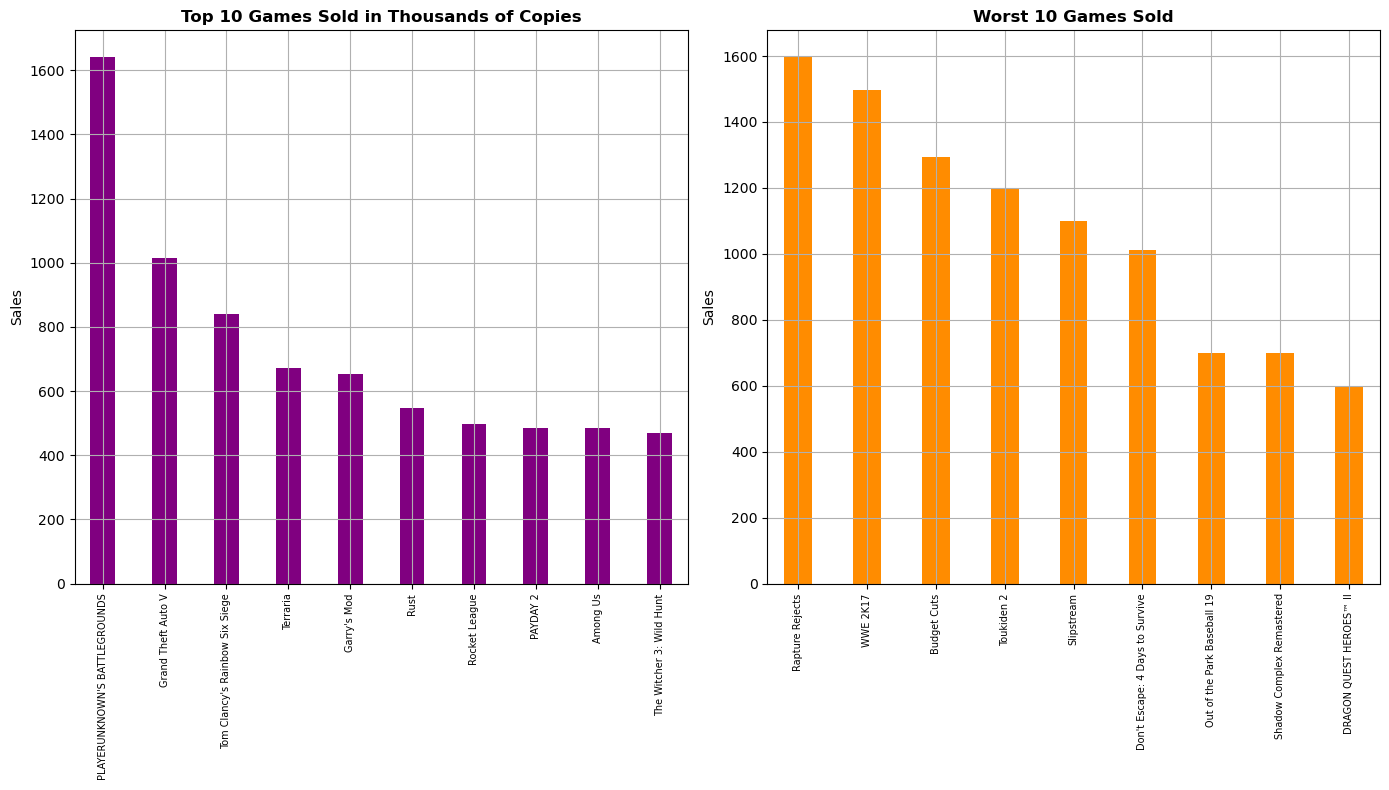

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
best_selling_games[:10].plot.bar(y='Sales', ax=axs[0], color='purple',width=0.4)
axs[0].set_title("Top 10 Games Sold in Thousands of Copies",weight="bold")
axs[0].tick_params(axis='x', labelsize=7)
axs[0].set_ylabel("Sales")
axs[0].set_xlabel("")
axs[0].grid()

worst_selling_games.plot.bar(y='Sales', ax=axs[1], color='darkorange',width=0.4)
axs[1].set_title("Worst 10 Games Sold",weight="bold")
axs[1].tick_params(axis='x', labelsize=7)
axs[1].set_ylabel("Sales")
axs[1].set_xlabel("")
axs[1].grid()  

plt.tight_layout()
plt.show()

From the graphs shown, it can be highlighted that the game "Playerunknown's Battlegrounds" (PUBG) in 2021 is the best-selling with over 160,000 copies. On the other hand, the game "Dragon Quest Heroes 2" is the least sold with only 600 copies. The success of online multiplayer games like PUBG  likely stems from both their competitive nature and the gaming industry's growth during the COVID-19 pandemic, when people sought virtual social interactions and entertainment while staying at home. Additionally, the gap between top and lower sellers suggests that factors like online component, cross-platform availability and continuous game updates play crucial roles in commercial success.

# **ALGORITHM QUESTION**

## Information about the Algorithm

You are given two positive integers, ( n ) (where 1 ≤ n ≤ 10^9) and and k (where q ≤ k ≤ 100).Your task is to express n as the sum of k positive integers, all having the same parity (i.e., all have the same remainder when divided by 2, meaning they are either all even or all odd). In other words, find a₁, a₂, ..., aₖ, each aᵢ > 0, such that n = a₁ + a₂ + ... + aₖ, and all aᵢ simultaneously are either even or odd. If it's impossible to represent n in this way, report that no such representation exists.

- ## Input
In the first input line, you will receive a number t (where 1 ≤ t ≤ 100), representing the number of test cases. The following t lines will contain two values, n and k, corresponding to each test case.

- ## Output
For each test case, if it is possible to represent n as the sum of k positive integers, all of the same parity (either all even or all odd), print YES and provide the corresponding values of aᵢ in the next line. If there are multiple valid solutions, you can print any of them. If such a representation is not possible for a given test case, print NO.

In [66]:
def check_express_as_sum(n, k):
    
    # Check for all odd integers
    if n >= k and (n % 2 == k % 2): 
        odd_sums = [1] * (k - 1) + [n - (k - 1)]
        print("YES")
        print(*odd_sums)
        return ""
    
    # Check for all even integers
    if n >= 2 * k and (n % 2 == 0):  
        even_sums = [2] * (k - 1) + [n - 2 * (k - 1)]
        print("YES")
        print(*even_sums)
        return ""
    
    # If neither condition met
    print("NO")
    return ""

# Computational Complexity of Algorithm

The function is designed to determine if a positive integer **n** can be expressed as the sum of **k** positive integers, all of which share the same parity (either all odd or all even). Here's an analysis of its computational complexity.

## Time Complexity

1. **Input Conditions**:

   - The function first checks if **n** can be expressed as the sum of **k** odd integers. This involves checking two conditions:
     - \( n $\geq$ k \): This check is  O(1) .
     - \( n % 2 = k % 2 \): This check is also  O(1).
   - If both conditions are satisfied, the function constructs a list of **k** odd integers, which takes  O(k) time, due to the creation of the list and the subsequent print operation.

   - The function then checks if  **n** can be expressed as the sum of **k** even integers. This again involves:
     - \( n $\geq$ 2k \): This check is O(1) .
     - \( n % 2 = 0 \): This check is O(1).
   - If both conditions are met, it constructs a list of **k** even integers, which also takes O(k) time for the same reasons mentioned above.

2. **Final Output**:
   - In the worst-case scenario, if neither condition is met, the function simply outputs "NO", which is also O(1).

### Summary of Time Complexity
The overall time complexity can be summarized as:
- **Best Case**: O(1) when **n** is small and conditions are not valid for both cases.
- **Worst Case**: O(k) when constructing the list of integers.

## Computational Complexity analysis by an LLM (Large Language Model)

## EXAMPLE

### **input and output**

In [67]:
n,k= 10, 3
print(check_express_as_sum(n, k))

YES
2 2 6



In [68]:
n,k= 8, 7
print(check_express_as_sum(n, k))


NO



In [69]:
n,k= 97, 2
print(check_express_as_sum(n, k))

NO



In [70]:
n,k= 8, 8
print(check_express_as_sum(n, k))

YES
1 1 1 1 1 1 1 1



In [71]:
n,k= 3, 10
print(check_express_as_sum(n, k))

NO



In [72]:
n,k= 5, 3
print(check_express_as_sum(n, k))

YES
1 1 3

